# CRISP DM

In [ ]:
Bussines Understanding

- Problem
Mobil merupakan alat transportasi yang banyak digunakan di Indonesia setelah sepeda motor. Banyak mobil-mobil
bekas di Indonesia dengan berbagai kondisi mobil. Sebagai showroom mobil, harus bisa mengklasifikasi mobil
mana saja yang masih layak untuk dijual kembali. Dataset ini berisi data-data mobil bekas dengan berbagai
kondisi.

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/subhajeetdas/car-acceptability-classification-dataset)
bertujuan untuk menganalisis dan mengklasifikasi kelayakan mobil bekas untuk dijual kembali. Diharapkan
model ini bisa membantu showroom mobil dalam menentukan apakah mobil tersebut masih layak untuk
dijual atau tidak.

In [ ]:
Data Understanding

Berikut atribut-atribut dari dataset ini :

Buying_Price = harga pertama beli mobil
Maintenance_Price = harga perbaikan mobil
No_of_Doors = jumlah pintu mobil
Person_Capacity = jumlah kursi mobil
Size_of_Luggage = ukuran bagasi mobil
Safety = tingkat keamanan mobil
Car_Acceptability = pengelompokkan penerimaan mobil

In [ ]:
Data Preparation

Yang menjadi fitur dalam dataset ini yaitu:

Buying_Price
Maintenance_Price
No_of_Doors
Person_Capacity
Size_of_Luggage
Safety

Sedangkan, yang menjadi target yaitu Car_Acceptability

# Import library

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("car.csv")

In [4]:
df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintenance_Price  1728 non-null   object
 2   No_of_Doors        1728 non-null   object
 3   Person_Capacity    1728 non-null   object
 4   Size_of_Luggage    1728 non-null   object
 5   Safety             1728 non-null   object
 6   Car_Acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Transformasi Data

In [6]:
# memisahkan numerik dan kategori
nomor = []
huruf = []

for col in df.columns:
    if df[col].dtype == 'float64':
        nomor.append(col)
    elif df[col].dtype == 'int64':
        nomor.append(col)
    else:
        huruf.append(col)

for col in df.columns:
    if col in nomor:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [7]:
nomor

[]

In [8]:
huruf

['Buying_Price',
 'Maintenance_Price',
 'No_of_Doors',
 'Person_Capacity',
 'Size_of_Luggage',
 'Safety',
 'Car_Acceptability']

In [9]:
df['Car_Acceptability'].value_counts()

Car_Acceptability
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in huruf:
    df[col] = le.fit_transform(df[col])

In [11]:
df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [12]:
df.to_csv('Cars.csv')

In [13]:
df['Car_Acceptability'].value_counts()

Car_Acceptability
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

# Visualisasi data

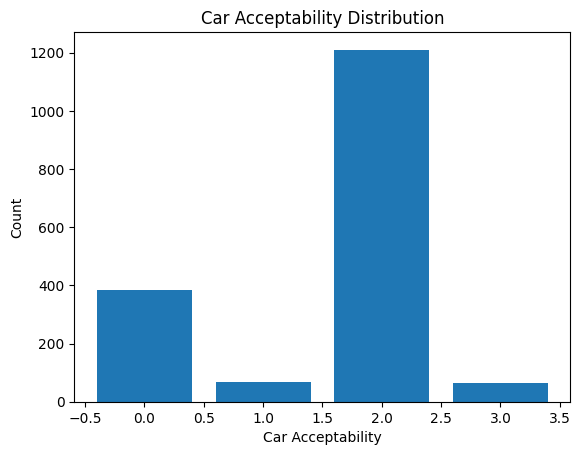

In [14]:
car_counts = df['Car_Acceptability'].value_counts()
plt.bar(car_counts.index, car_counts.values)
plt.title('Car Acceptability Distribution')
plt.xlabel('Car Acceptability')
plt.ylabel('Count')

plt.show()

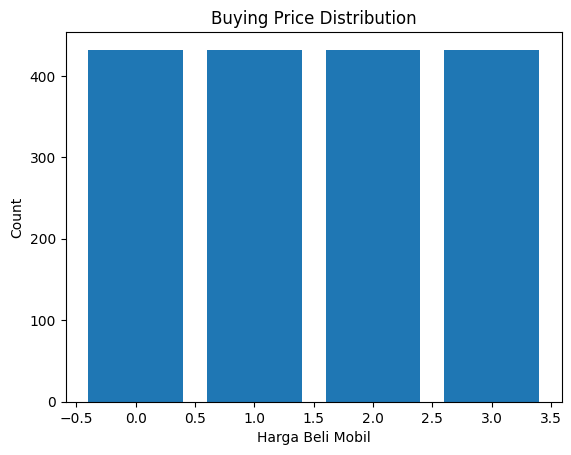

In [15]:
car_counts = df['Buying_Price'].value_counts()
plt.bar(car_counts.index, car_counts.values)
plt.title('Buying Price Distribution')
plt.xlabel('Harga Beli Mobil')
plt.ylabel('Count')

plt.show()

# Split data

In [18]:
X = df.drop(columns=['Car_Acceptability'], axis=1)
Y = df['Car_Acceptability']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [20]:
print(X.shape, x_train.shape, x_test.shape)

(1728, 6) (1382, 6) (346, 6)


# Modeling

### Membuat model training

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [22]:
model = knn.fit(x_train, y_train)

# Evaluation

### Evaluasi model

In [23]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [24]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.967438494934877


In [25]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [26]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.9075144508670521


# Model Prediksi

In [27]:
input_data = (2,1,0,1,1,0)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi = model.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
    print('Kondisi mobil ini diterima')
elif (prediksi == 1):
    print('Kondisi mobil ini dalam keadaan baik')
elif (prediksi == 2):
    print('Kondisi mobil ini tidak diterima')
else:
    print('Kondisi mobil ini keadaannya sangat baik')

[1]
Kondisi mobil ini dalam keadaan baik


c:\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Deployment

### Save Model

In [28]:
import pickle

filename = 'mobil.sav'
pickle.dump(model, open(filename, 'wb'))